Project Name- Covid virus predictions using X-ray images dataset.
Author- Aarush Kumar(aarushkumar100616@gmail.com)
Dated- May07,2021

In [56]:
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

The first cell consists of importing of various libraries in Python.
--> First of all we imported matplotlib.pyplot which is a collection of functions that make matplotlib work like       MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in     a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
--> Now imported various tensorflow layers for fast numerical computing. It is a foundation library that can be         used to create Deep Learning models directly or by using wrapper libraries.
--> At last I imported sklearn library as it contains a lot of efficient tools for machine learning and statistical     modeling including classification, regression, clustering and dimensionality reduction.

In [27]:
dataset= r'/home/aarush100616/Downloads/Data'

In above cell I have given location for dataset on which predictions are to be made.It differs from system to system.

In [29]:
INIT_LR=1e-3
EPOCHS=10
BS=8

The above cell is used to crete model in this first of all INIT_LR is the initial learning rate at which model will learn,EPOCHS is the reading the quantity of images,BS is the number of times you want to throw the images for analysis.

In [30]:
args={}
args['dataset']=dataset

In [31]:
args

{'dataset': '/home/aarush100616/Downloads/Data'}

In [67]:
import numpy as np
import cv2
import os



iPaths=list(paths.list_images(args["dataset"]))

data=[]
labels=[]

for iPath in iPaths:
    label=iPath.split(os.path.sep)[-2]
    image=cv2.imread(iPath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(224,224))
    data.append(image)
    labels.append(label)
    
data=np.array(data)/255.0
labels=np.array(labels)

In [59]:
image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 89,  89,  89],
        [ 96,  96,  96],
        [129, 129, 129]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 97,  97,  97],
        [110, 110, 110],
        [126, 126, 126]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [103, 103, 103],
        [106, 106, 106],
        [119, 119, 119]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [136, 136, 136],
        [137, 137, 137],
        [121, 121, 121]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [123, 123, 123]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [134, 134, 134],
        [136, 136, 136],
        [127, 127, 127]]

In [64]:
data

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.39215686, 0.39215686, 0.39215686],
         [0.34509804, 0.34509804, 0.34509804],
         [0.28627451, 0.28627451, 0.28627451]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.36078431, 0.36078431, 0.36078431],
         [0.34901961, 0.34901961, 0.34901961],
         [0.30196078, 0.30196078, 0.30196078]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.37647059, 0.37647059, 0.37647059],
         [0.35294118, 0.35294118, 0.35294118],
         [0.27843137, 0.27843137, 0.27843137]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [68]:
labels

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

Normal Chest X-ray Vs Covid-19 Chest X-ray


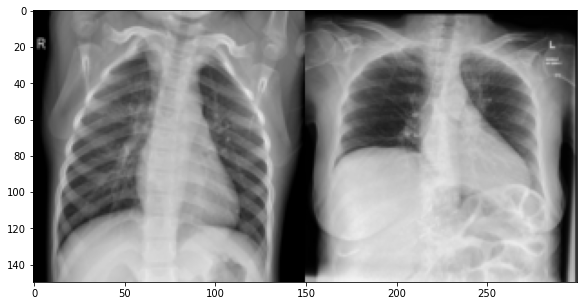

Normal Chest X-ray Vs Covid-19 Chest X-ray


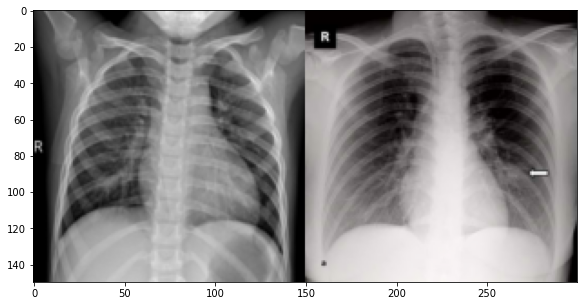

Normal Chest X-ray Vs Covid-19 Chest X-ray


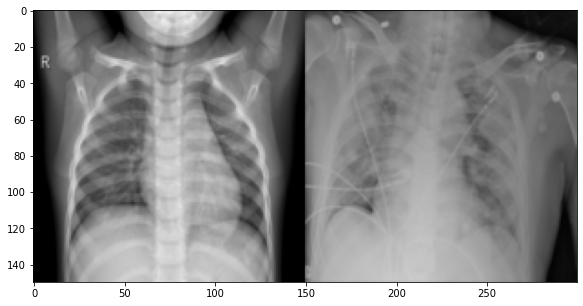

Normal Chest X-ray Vs Covid-19 Chest X-ray


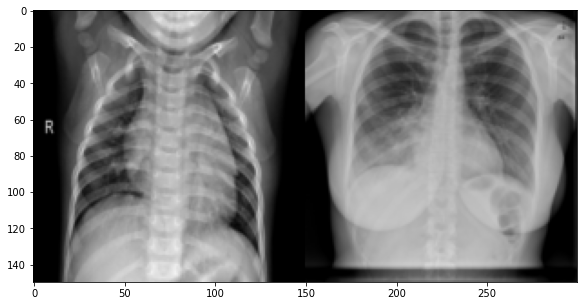

Normal Chest X-ray Vs Covid-19 Chest X-ray


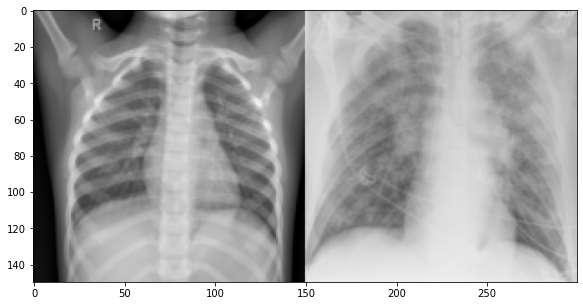

In [87]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage import filters
Cimages = os.listdir(dataset+"/Covid")
Nimages = os.listdir(dataset+"/Normal")
import numpy as np
def plotter(i):
    normal = cv2.imread(dataset+"/Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(dataset+"/Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [88]:
LB=LabelBinarizer()
labels=LB.fit_transform(labels)
labels=to_categorical(labels)
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [91]:
from sklearn.model_selection import train_test_split as sklearn_train_test_split
(X_train,X_test,Y_train,Y_test)=train_test_split(data,labels,test_size=0.20,random_state=42,stratify=labels)

In [94]:
X_train.shape

(160, 224, 224, 3)

In [95]:
trainAug=ImageDataGenerator(rotation_range=15,fill_mode='nearest')

In [96]:
trainAug

In [97]:
bmodel=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

58892288/58889256 [==============================] - 14s 0us/step


In [98]:
bmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [101]:
hmodel=bmodel.output
hmodel=AveragePooling2D(pool_size=(4,4))(hmodel)
hmodel=Flatten(name='flatten')(hmodel)
hmodel=Dense(64,activation='relu')(hmodel)
hmodel=Dropout(0.5)(hmodel)
hmodel=Dense(2,activation='softmax')(hmodel)

model=Model(bmodel.input,hmodel)
for layer in bmodel.layers:
    layer.trainable=False

In [102]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/home/aarush100616/.local/lib/python3.7/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


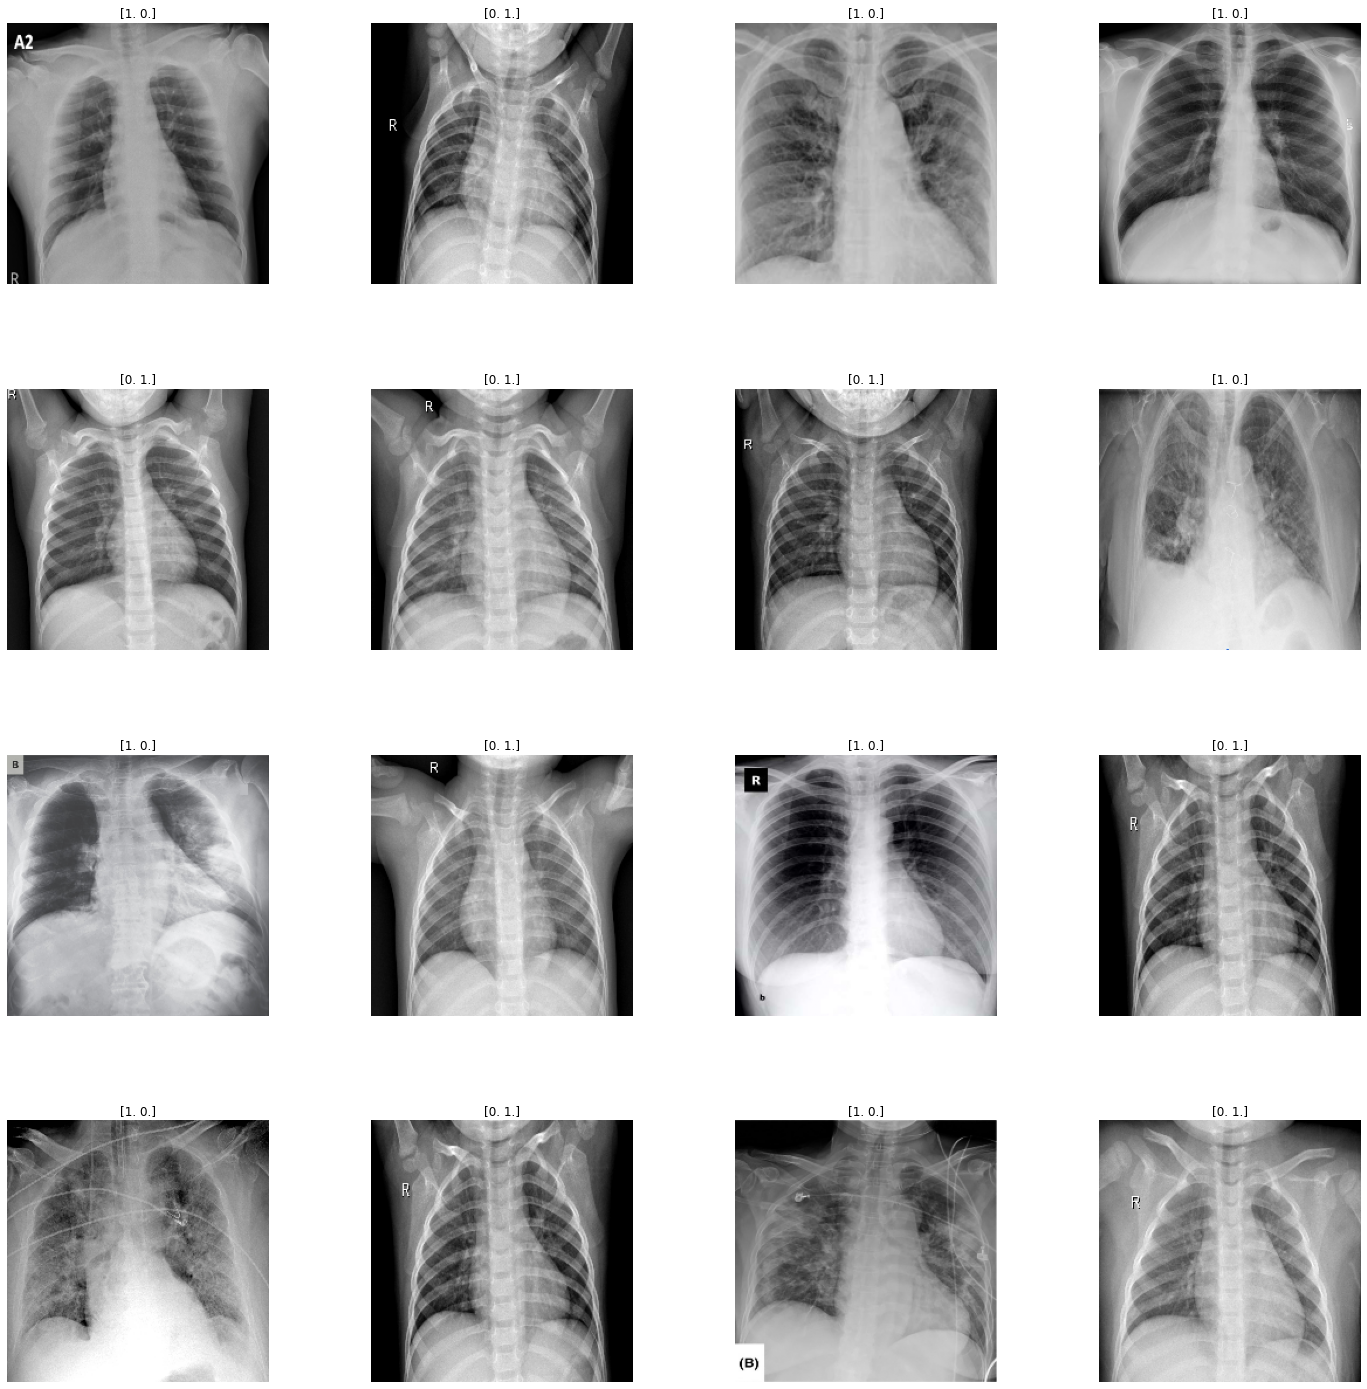

In [103]:
W_grid = 4
L_grid = 4
fig, axes= plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [110]:
opt= Adam(lr=INIT_LR,decay=INIT_LR/EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")

Compiling Starts


In [113]:
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 20 steps, validate on 40 samples
Epoch 1/10
20/20 [==============================] - 49s 2s/step - loss: 0.8228 - accuracy: 0.5437 - val_loss: 0.5774 - val_accuracy: 0.7500
Epoch 2/10
20/20 [==============================] - 63s 3s/step - loss: 0.6883 - accuracy: 0.5938 - val_loss: 0.4266 - val_accuracy: 0.9000
Epoch 3/10
20/20 [==============================] - 66s 3s/step - loss: 0.4513 - accuracy: 0.7937 - val_loss: 0.3287 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 64s 3s/step - loss: 0.3881 - accuracy: 0.8813 - val_loss: 0.2571 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 65s 3s/step - loss: 0.3205 - accuracy: 0.9187 - val_loss: 0.1986 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 67s 3s/step - loss: 0.2268 - accuracy: 0.9500 - val_loss: 0.1566 - val_accuracy: 1.0000
Epoch 7/10
20/20

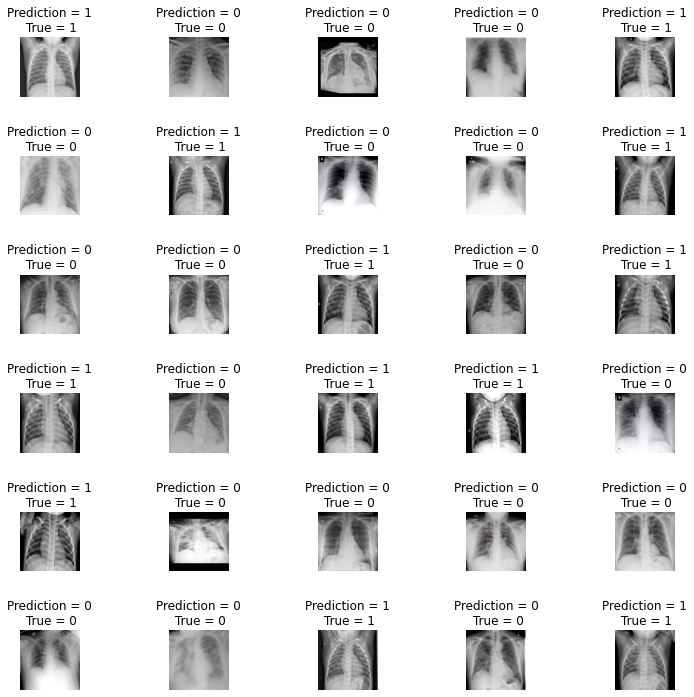

In [114]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [120]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



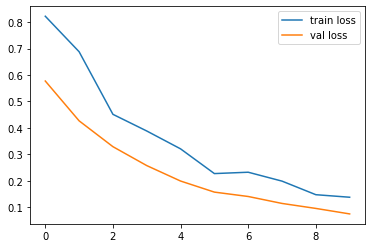

<Figure size 432x288 with 0 Axes>

In [121]:
#graph for loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

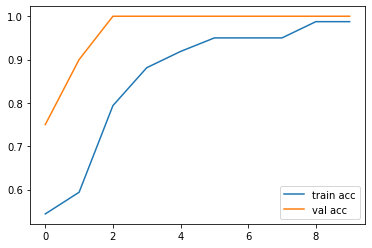

In [122]:
# graph for accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [123]:
model.save(r'/home/aarush100616/Downloads/Data/Model.h5')

In [124]:
import tensorflow as tf
from keras.preprocessing import image
model=tf.keras.models.load_model(r'/home/aarush100616/Downloads/Data/Model.h5')
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


Prediction: Normal


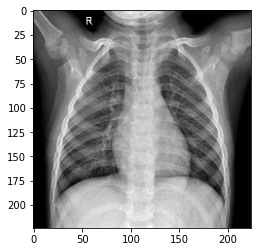

In [126]:
img = image.load_img('/home/aarush100616/Downloads/Data/Normal/IM-0135-0001.jpeg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

Prediction: Corona


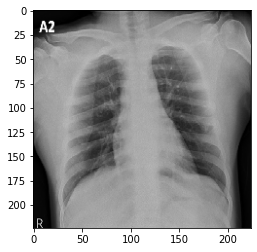

In [127]:
img = image.load_img('/home/aarush100616/Downloads/Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')